# DEEP LEARNING PROJECT-2: CNN

**Fruit Classfication using CNN**

For our second project we selected fruits classification. We chose 5 classes of fruits. Each class having 200 images and a total of 1000 images. the classes are apple, banana, mango, orange and strawberry.

Here, the dataset was uploaded in Google Drive and it was mounted in Colab Notebook

In [ ]:
#Setting google drive as a directory for dataset
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dir_path = "gdrive/My Drive/Fruits2"

**Checking the files in the directory**

In [ ]:
import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

gdrive/My Drive/Fruits2/test/apple/Image_9.png
gdrive/My Drive/Fruits2/test/apple/Image_7.png
gdrive/My Drive/Fruits2/test/apple/Image_19.png
gdrive/My Drive/Fruits2/test/apple/Image_1.png
gdrive/My Drive/Fruits2/test/apple/Image_8.png
gdrive/My Drive/Fruits2/test/apple/Image_4.png
gdrive/My Drive/Fruits2/test/apple/Image_13.png
gdrive/My Drive/Fruits2/test/apple/Image_22.png
gdrive/My Drive/Fruits2/test/apple/Image_17.png
gdrive/My Drive/Fruits2/test/apple/Image_23.png
gdrive/My Drive/Fruits2/test/apple/Image_11.png
gdrive/My Drive/Fruits2/test/apple/Image_24.png
gdrive/My Drive/Fruits2/test/apple/Image_16.png
gdrive/My Drive/Fruits2/test/apple/Image_6.png
gdrive/My Drive/Fruits2/test/apple/Image_2.png
gdrive/My Drive/Fruits2/test/apple/Image_15.png
gdrive/My Drive/Fruits2/test/apple/Image_14.png
gdrive/My Drive/Fruits2/test/apple/Image_5.png
gdrive/My Drive/Fruits2/test/apple/Image_21.png
gdrive/My Drive/Fruits2/test/apple/Image_18.png
gdrive/My Drive/Fruits2/test/apple/Image_12.png


**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Activation,Dropout,Dense,Conv2D,AveragePooling2D,Flatten,ZeroPadding2D,MaxPooling2D
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import math
import cv2
import imageio
from os import listdir
import warnings
import filecmp
from PIL import Image

In [ ]:
import sys
sys.path.append('/content/gdrive/utils')

In [ ]:
!unzip -u "/content/gdrive/My Drive/Fruits2.zip" -d "/content/gdrive/My Drive/"

Archive:  /content/gdrive/My Drive/Fruits2.zip


In [ ]:
!unzip -q "/content/gdrive/My Drive/Fruits2.zip"


In [ ]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision import datasets, transforms

In [ ]:
transform =  transforms.Compose([transforms.ToTensor(),transforms.Resize((32,32))])
train_data = datasets.ImageFolder(root = '/content/gdrive/My Drive/Fruits2/train', transform = transform)
test_data = datasets.ImageFolder(root = '/content/gdrive/My Drive/Fruits2/test', transform = transform)

In [ ]:
train_loader = DataLoader(train_data, batch_size= 4, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 4, shuffle=True)

**Visualising images**

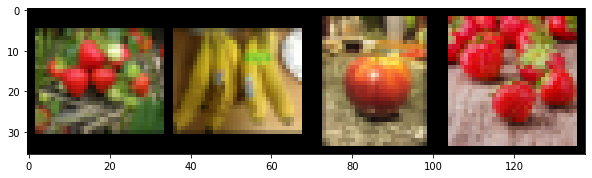

In [ ]:
for images,labels in train_loader:
    break
im = make_grid(images[0:10], nrow= 5) 
plt.figure(figsize=(10,5))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [ ]:
images.shape

torch.Size([4, 3, 32, 32])

In [ ]:
mean= images.mean()
std= images.std()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mean = mean.to(device)
std = std.to(device)

**Convolutional neural network model**


After defining the data sets as training and testing sets we go on to implement the CNN model



In [ ]:
class convNet(nn.Module):
    def __init__ (self):
        super().__init__()
      
        self.conv1 = nn.Conv2d(3,5,5,1)  
        self.conv2 = nn.Conv2d(5,20,3,1)         

        self.fc1 = nn.Linear(6*6*20,120)
        self.fc2 = nn.Linear(120,80)
        self.fc3 = nn.Linear(80,7)

    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))  
        x = F.max_pool2d(x,2,2)

        x = x.view(-1,6*6*20)        

        x = F.relu(self.fc1(x))        
        x = F.relu(self.fc2(x))  
        x = F.log_softmax(self.fc3(x),dim = 1)    
        return(x)

In [ ]:
for i , (X_train,y_train) in enumerate(train_data):     
    break
x = X_train.view(-1,3,32,32)

In [ ]:
model = convNet().to(device)
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [ ]:
for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        inputs = (inputs-mean)/std

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)

In [ ]:
classes = ('apple', 'orange', 'mango', 'strawberry','banana')
outputs = model(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  apple orange orange apple


In [ ]:
from google.colab import files
files.upload()

Saving utils.py to utils.py


{'utils.py': b'import torch\r\nimport numpy as np\r\nimport matplotlib.pyplot as plt\r\nimport seaborn as sns\r\n\r\ncmap = sns.diverging_palette(262, 10, sep=1, n=16, s=99, l=50, center="dark", as_cmap=True) # best\r\n\r\n\r\ndef show(X):\r\n\tif X.dim() == 3 and X.size(0) == 3:\r\n\t\tplt.imshow( np.transpose(  X.numpy() , (1, 2, 0))  )\r\n\t\tplt.show()\r\n\telif X.dim() == 2:\r\n\t\tplt.imshow(   X.numpy() , cmap=\'gray\'  )\r\n\t\tplt.show()\r\n\telse:\r\n\t\tprint(\'WRONG TENSOR SIZE\')\r\n\r\n\r\ndef show_template(template):\r\n\tvm=0.3  \r\n\theight=4\r\n\twidth=6  \r\n\tf, ax1 = plt.subplots()\r\n\ttemp=template.detach().numpy()\r\n\tsns.heatmap(temp, cmap=cmap, ax=ax1, cbar=True,square=True,vmin=-vm, vmax=vm )  \r\n\tplt.show()\r\n\r\n\r\n\r\ndef show_prob_mnist(p):\r\n\r\n\tp=p.data.squeeze().numpy()\r\n\r\n\tft=15\r\n\tlabel = (\'zero\', \'one\', \'two\', \'three\', \'four\', \'five\', \'six\', \'seven\', \'eight\',\'nine\')\r\n\t#p=p.data.squeeze().numpy()\r\n\ty_pos = np.

In [ ]:
!python utils.py

In [ ]:

import utils
 

num_batches = 0
with torch.no_grad():
    for data in test_loader:
        image, label = data
        image = image.to(device)
        label = label.to(device)
        me = image.mean()
        me = mean.to(device)
        st = image.std()
        st = std.to(device)
        image = (image-me)/st
   # calculate outputs by running images through the network
        outputs = model(image)

        error = utils.get_error( outputs , label)

        running_error=0
        running_error+=error.item()

        num_batches+=1

#check performance
total_error = running_error/num_batches
print( 'error rate on test set =', total_error*100 ,'percent')
print('accuracy on the test set =',(100-(total_error*100)),'percent')      


error rate on test set = 0.7936507936507936 percent
accuracy on the test set = 99.2063492063492 percent
error rate on test set = 0.7936507936507936 percent
accuracy on the test set = 99.2063492063492 percent


**Calculate accuracy in each class**


In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        image, label = data
        image = image.to(device)
        label = label.to(device)
        me = image.mean()
        me = mean.to(device)
        st = image.std()
        st = std.to(device)
        image = (image-me)/st
        outputs = model(image)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname]!=0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: apple is 30.6 %
Accuracy for class: orange is 30.6 %
Accuracy for class: mango is 14.3 %
Accuracy for class: strawberry is 14.5 %
Accuracy for class: banana is 15.9 %
